In [12]:
import numpy as np
# Makes list from 0 to N -1 
N=20
a=np.arange(0,N)

np.random.shuffle(a)
print(a)

[18 17  2 10 12  4  0 14  7 15  5  1  3 11 13  8 16  9  6 19]


In [17]:
a = np.array([[0,1], [2,3]])
a[0,1]

1

In [2]:
from utils.constants import *
from utils.plotting import *
from utils.access_data import get_data,get_wavelengths

In [5]:

ss= get_data()

a= get_wavelengths( "C1PO17", ss, cut=True)

In [6]:
a


array([0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61,
       0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83,
       0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94,
       0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05,
       1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16,
       1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27,
       1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38,
       1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49,
       1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 ,
       1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71,
       1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82,
       1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.

For Mixture
Log Likelihood: 269.988
SAD : 0.03027868533536053


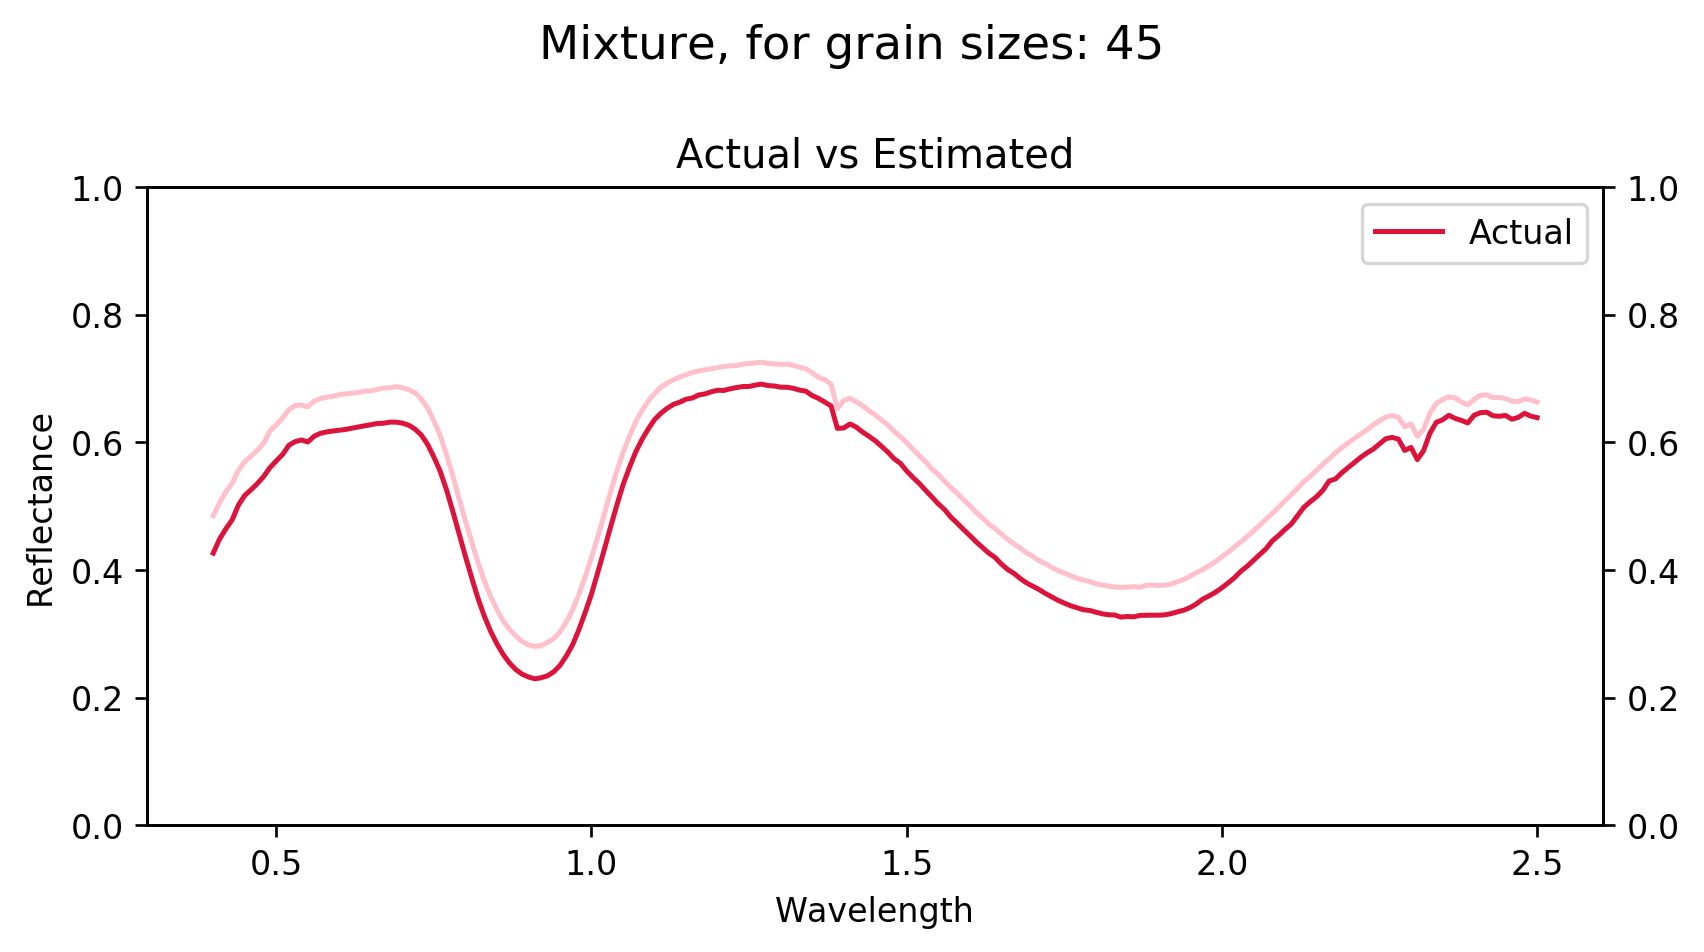

In [3]:
mixed_m_map = {pure_olivine_sid : .001,
         pure_enstatite_sid: .75,
         pure_anorthite_sid: .25}
D_map = {pure_olivine_sid : 45,
         pure_enstatite_sid: 45,
         pure_anorthite_sid: 45}
plot_estimated_versus_actual(enstatite_anorthite_mix_sid4, 
                             ss, 
                             mixed_m_map, 
                             D_map)

In [2]:
olivine_m_map = {pure_olivine_sid : .98,
         pure_enstatite_sid: .005,
         pure_anorthite_sid: .005}
enstatite_m_map = {pure_olivine_sid : .005,
         pure_enstatite_sid: .99,
         pure_anorthite_sid: .005}
anorthite_m_map = {pure_olivine_sid : .005,
         pure_enstatite_sid: .005,
         pure_anorthite_sid: .99}

D_map = {pure_olivine_sid : 45,
         pure_enstatite_sid: 45,
         pure_anorthite_sid: 45}
D_map2 = {pure_olivine_sid : 75,
         pure_enstatite_sid: 75,
         pure_anorthite_sid: 75}


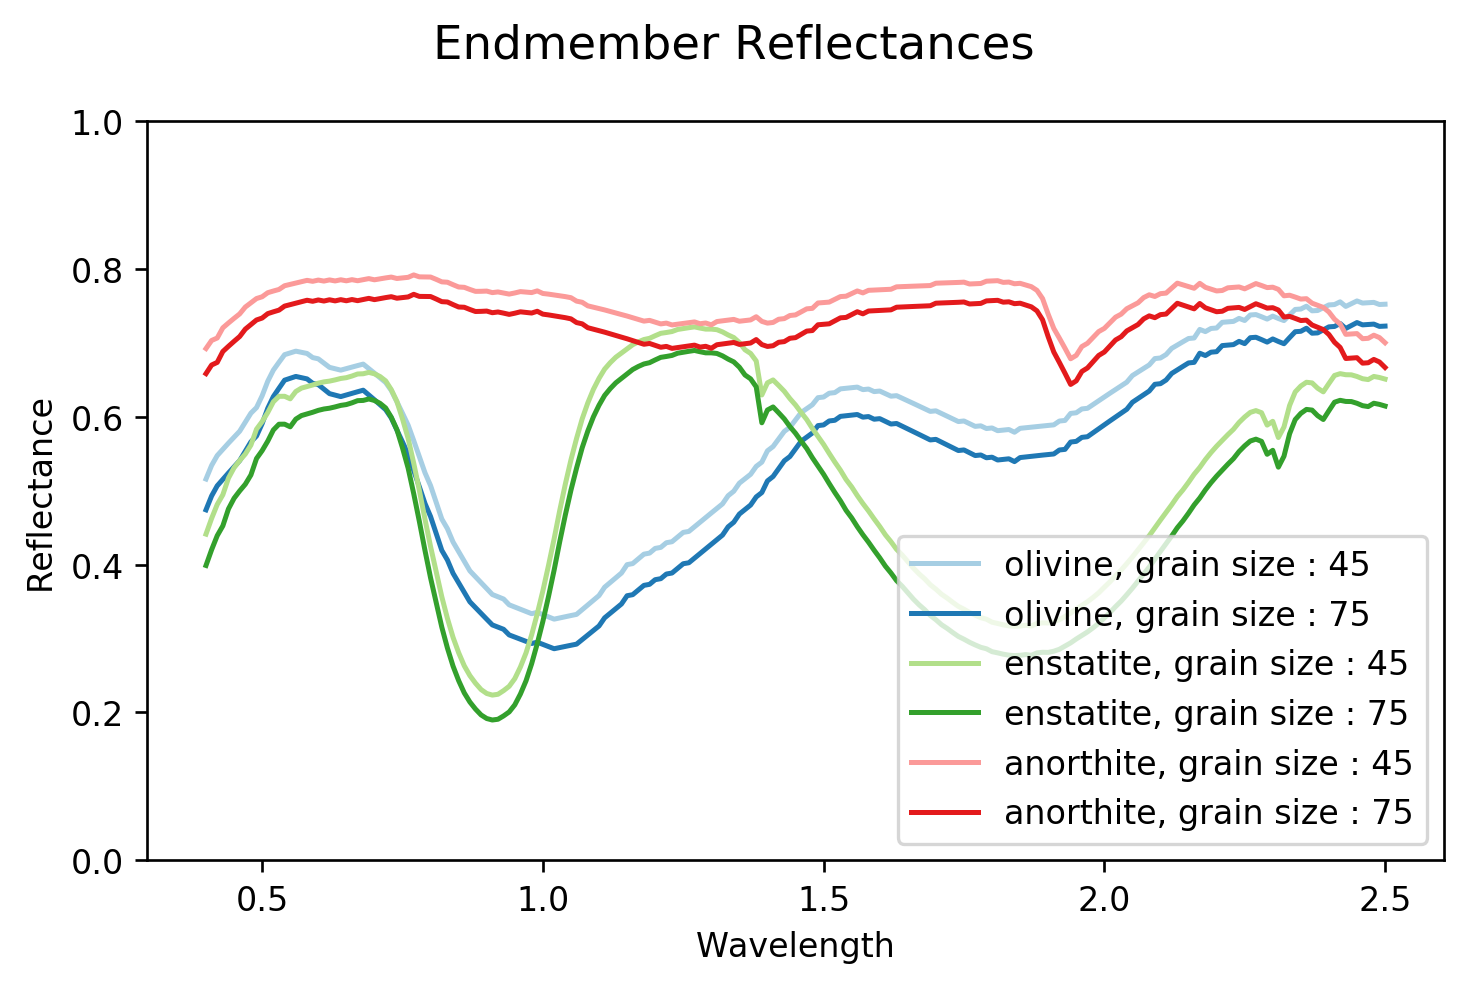

In [3]:
plot_overlay_reflectances(SIDs=[pure_olivine_sid, pure_olivine_sid,
                                pure_enstatite_sid, pure_enstatite_sid, 
                                pure_anorthite_sid, pure_anorthite_sid], 
                          m_maps=[olivine_m_map, olivine_m_map,
                                  enstatite_m_map, enstatite_m_map,
                                 anorthite_m_map, anorthite_m_map], 
                          D_maps=[D_map, D_map2, D_map, D_map2, D_map, D_map2],
                          title = "Endmember Reflectances")


In [10]:
file_name = CATALOGUE_PATH + "Modal_Mineralogy.xls"
Modal_Mineralogy = pd.read_excel(file_name)
Modal_Mineralogy['SampleID'] = Modal_Mineralogy['Sample ID'].str.strip()

Modal_Mineralogy[Modal_Mineralogy['SampleID'] == "XA-CMP-004"]

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# olivine_enstatite_mix_sid6
#  75% Olivine, 25% enstatite
row = ss[ss['SpectrumID'] == enstatite_anorthite_mix_sid4]
row

In [1]:
from preprocessing.generate_data import generate_image
import matplotlib.pyplot as plt

num_mixtures = 5
grid_res = 4
noise_scale = 0.01  # 0.001
res = 8
seg_iterations = 2  # 100000
mcmc_iterations = 1  # 10000

# Print metadata
print("Generating data with: ")
print("\t" + str(num_mixtures) + " unique mixtures")
print("\t" + str(noise_scale) + " noise (sigma)")
print("\t" + str(grid_res) + " grid resolution")
print("\t" + str(res) + " pixel resolution")
print("\t" + str(seg_iterations) + " iterations")

print("Conducting MCMC with: ")
print("\t" + str(mcmc_iterations) + " iterations")

image = generate_image(num_mixtures=num_mixtures,
                       grid_res=grid_res,
                       noise_scale=noise_scale,
                       res=res)
m_actual = image.m_image
D_actual = image.D_image

# plt.imshow(image.r_image)

plt.imshow(m_actual)

Generating data with: 
	5 unique mixtures
	0.01 noise (sigma)
	4 grid resolution
	8 pixel resolution
	2 iterations
Conducting MCMC with: 
	1 iterations
